# Discovery and Learning with Big Data/Machine Learning
## Sri Charan Bodduna
## Machine Learning Supervised Linear Regression

In [2]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix


from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



import seaborn as sns
sns.set(color_codes=True)

import matplotlib.pyplot as plt

In [3]:
#We are provding location of the dataset.  

housingfile = '/Users/sricharanbodduna/Downloads/housing boston.csv'

In [4]:
# Loading the data into dataframe

df= pd.read_csv (housingfile, header=None)

## Label the columns since there are no headers

In [5]:
#give names to the columns

col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'AA', 'LSTAT', 'MEDV']

In [6]:
# we are adding columns to the dataset

df.columns = col_names

## Look at the dataframe

In [7]:
#  To print the first 5 rows of data

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,AA,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Preprocess the Dataset
### Clean the data: Find and Mark Missing Values

In [8]:
df.isnull().sum()

# To fetch the sum of null data in the dataframe object

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
AA         0
LSTAT      0
MEDV       0
dtype: int64

## Performing the Exploratory Data Analysis (EDA)

In [9]:
# To get the number of rows, and columns from dataframe

print(df.shape)

(452, 14)


In [10]:
# To print the data types of all variables

print(df.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
AA         float64
LSTAT      float64
MEDV       float64
dtype: object


In [11]:
# To summarize the statistics of the data

print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean     1.420825   12.721239   10.304889    0.077434    0.540816    6.343538   
std      2.495894   24.326032    6.797103    0.267574    0.113816    0.666808   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.069875    0.000000    4.930000    0.000000    0.447000    5.926750   
50%      0.191030    0.000000    8.140000    0.000000    0.519000    6.229000   
75%      1.211460   20.000000   18.100000    0.000000    0.605000    6.635000   
max      9.966540  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO          AA  \
count  452.000000  452.000000  452.000000  452.000000  452.000000  452.000000   
mean    65.557965    4.043570    7.823009  377.442478   18.247124  369.826504   
std     28.127025    2.0904

## Creating a Histogram

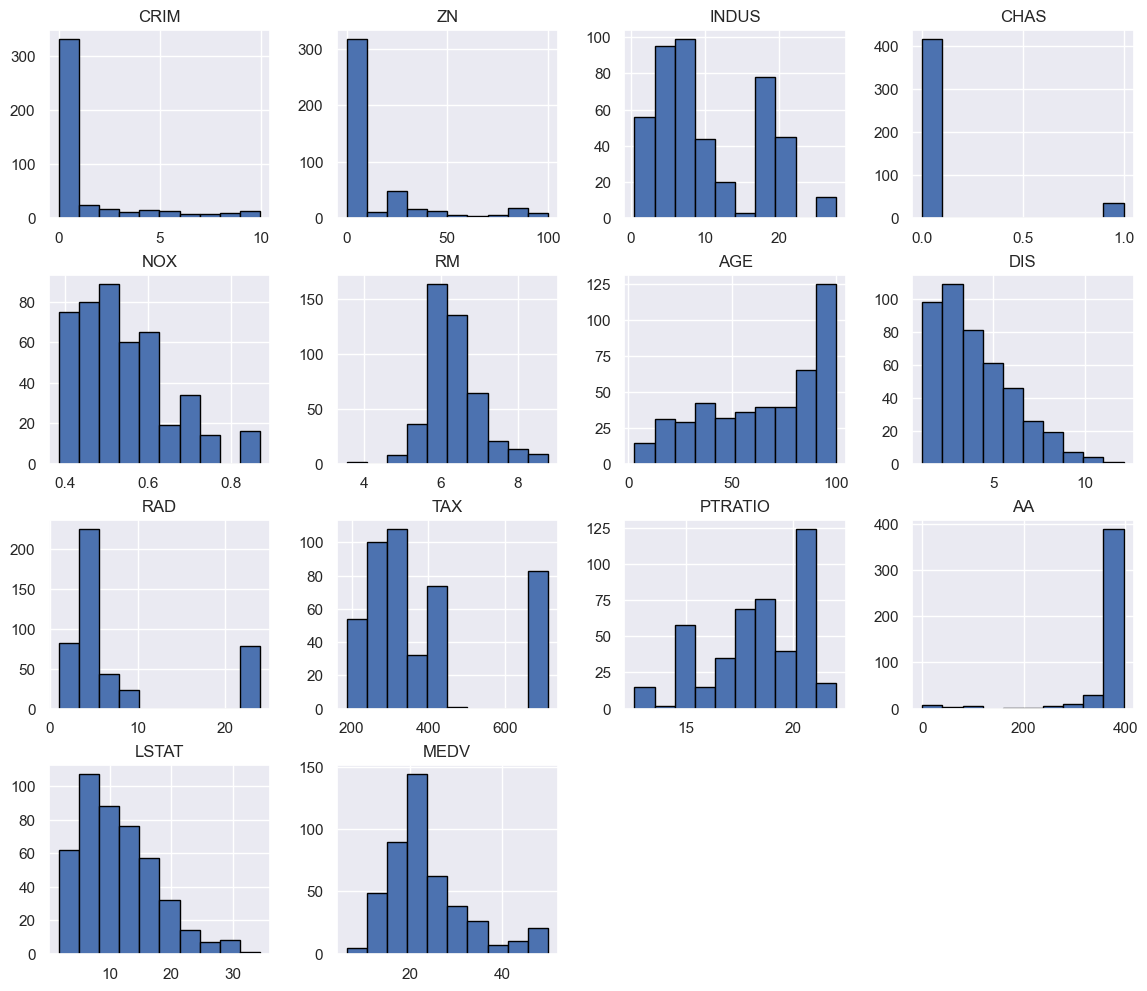

In [12]:
# To plot the histogram graph for each variable.

df.hist(edgecolor= 'black',figsize=(14,12))
plt.show()

## Creating a Density Plot

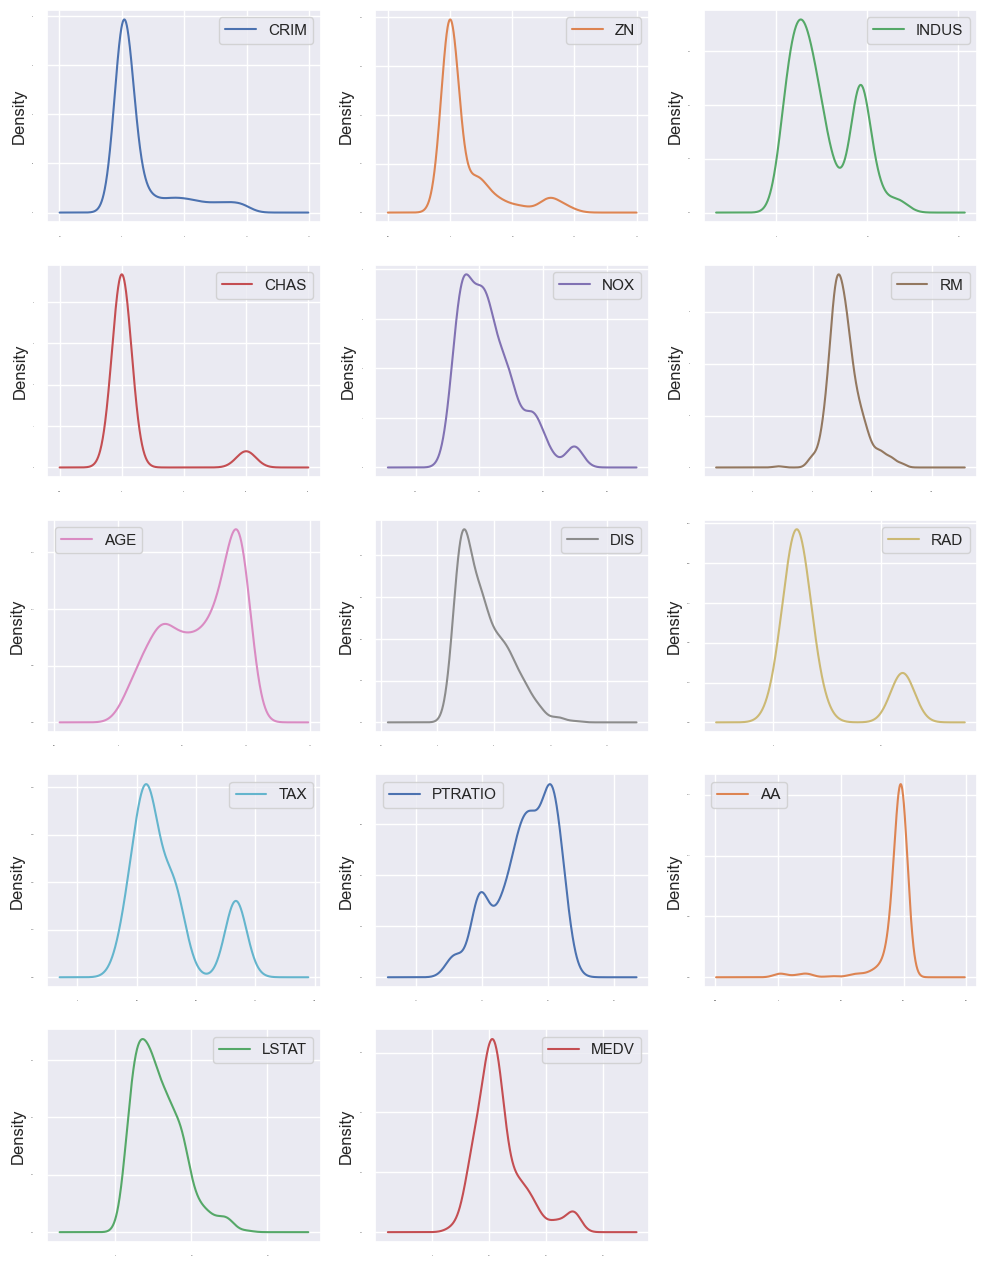

In [13]:
# Density plots
#Here we have 14 numeric variable, at least 14 plots, layout (5,3): 5 rows, each row with 3 plots
# In this code we are trying to plot the density for the variables of dataframe object using the kind=density

df.plot(kind='density', subplots=True, layout= (5,3), sharex=False, legend=True, fontsize=1, figsize= (12,16))
plt.show()

## Creating a Box Plot

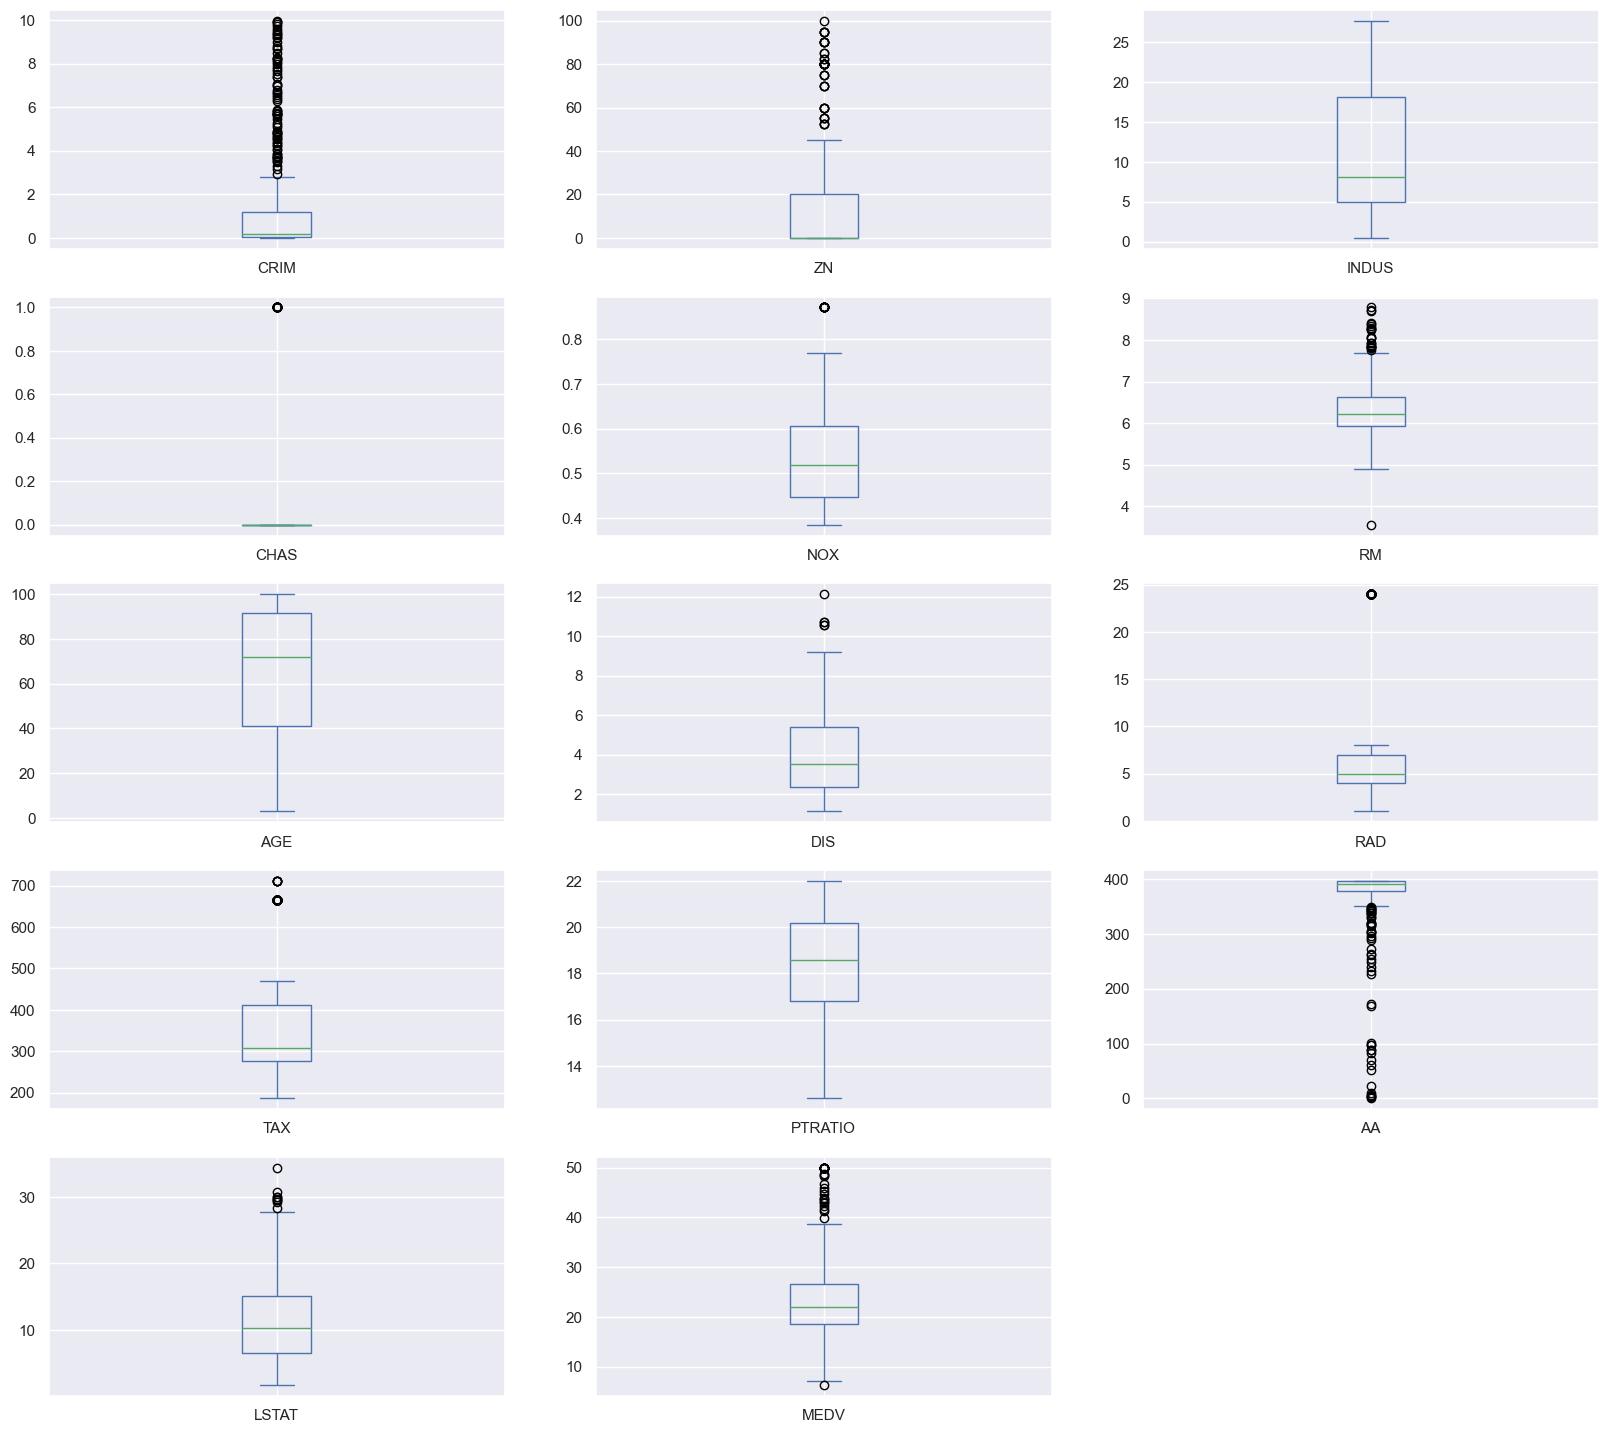

In [14]:
# In the below code we are plotted the box plot by passing the argument as the kind=box

df.plot(kind="box", subplots=True, layout=(5,3), sharex=False, figsize=(20,18))
plt.show()

## Correlation Analysis and Feature Selection

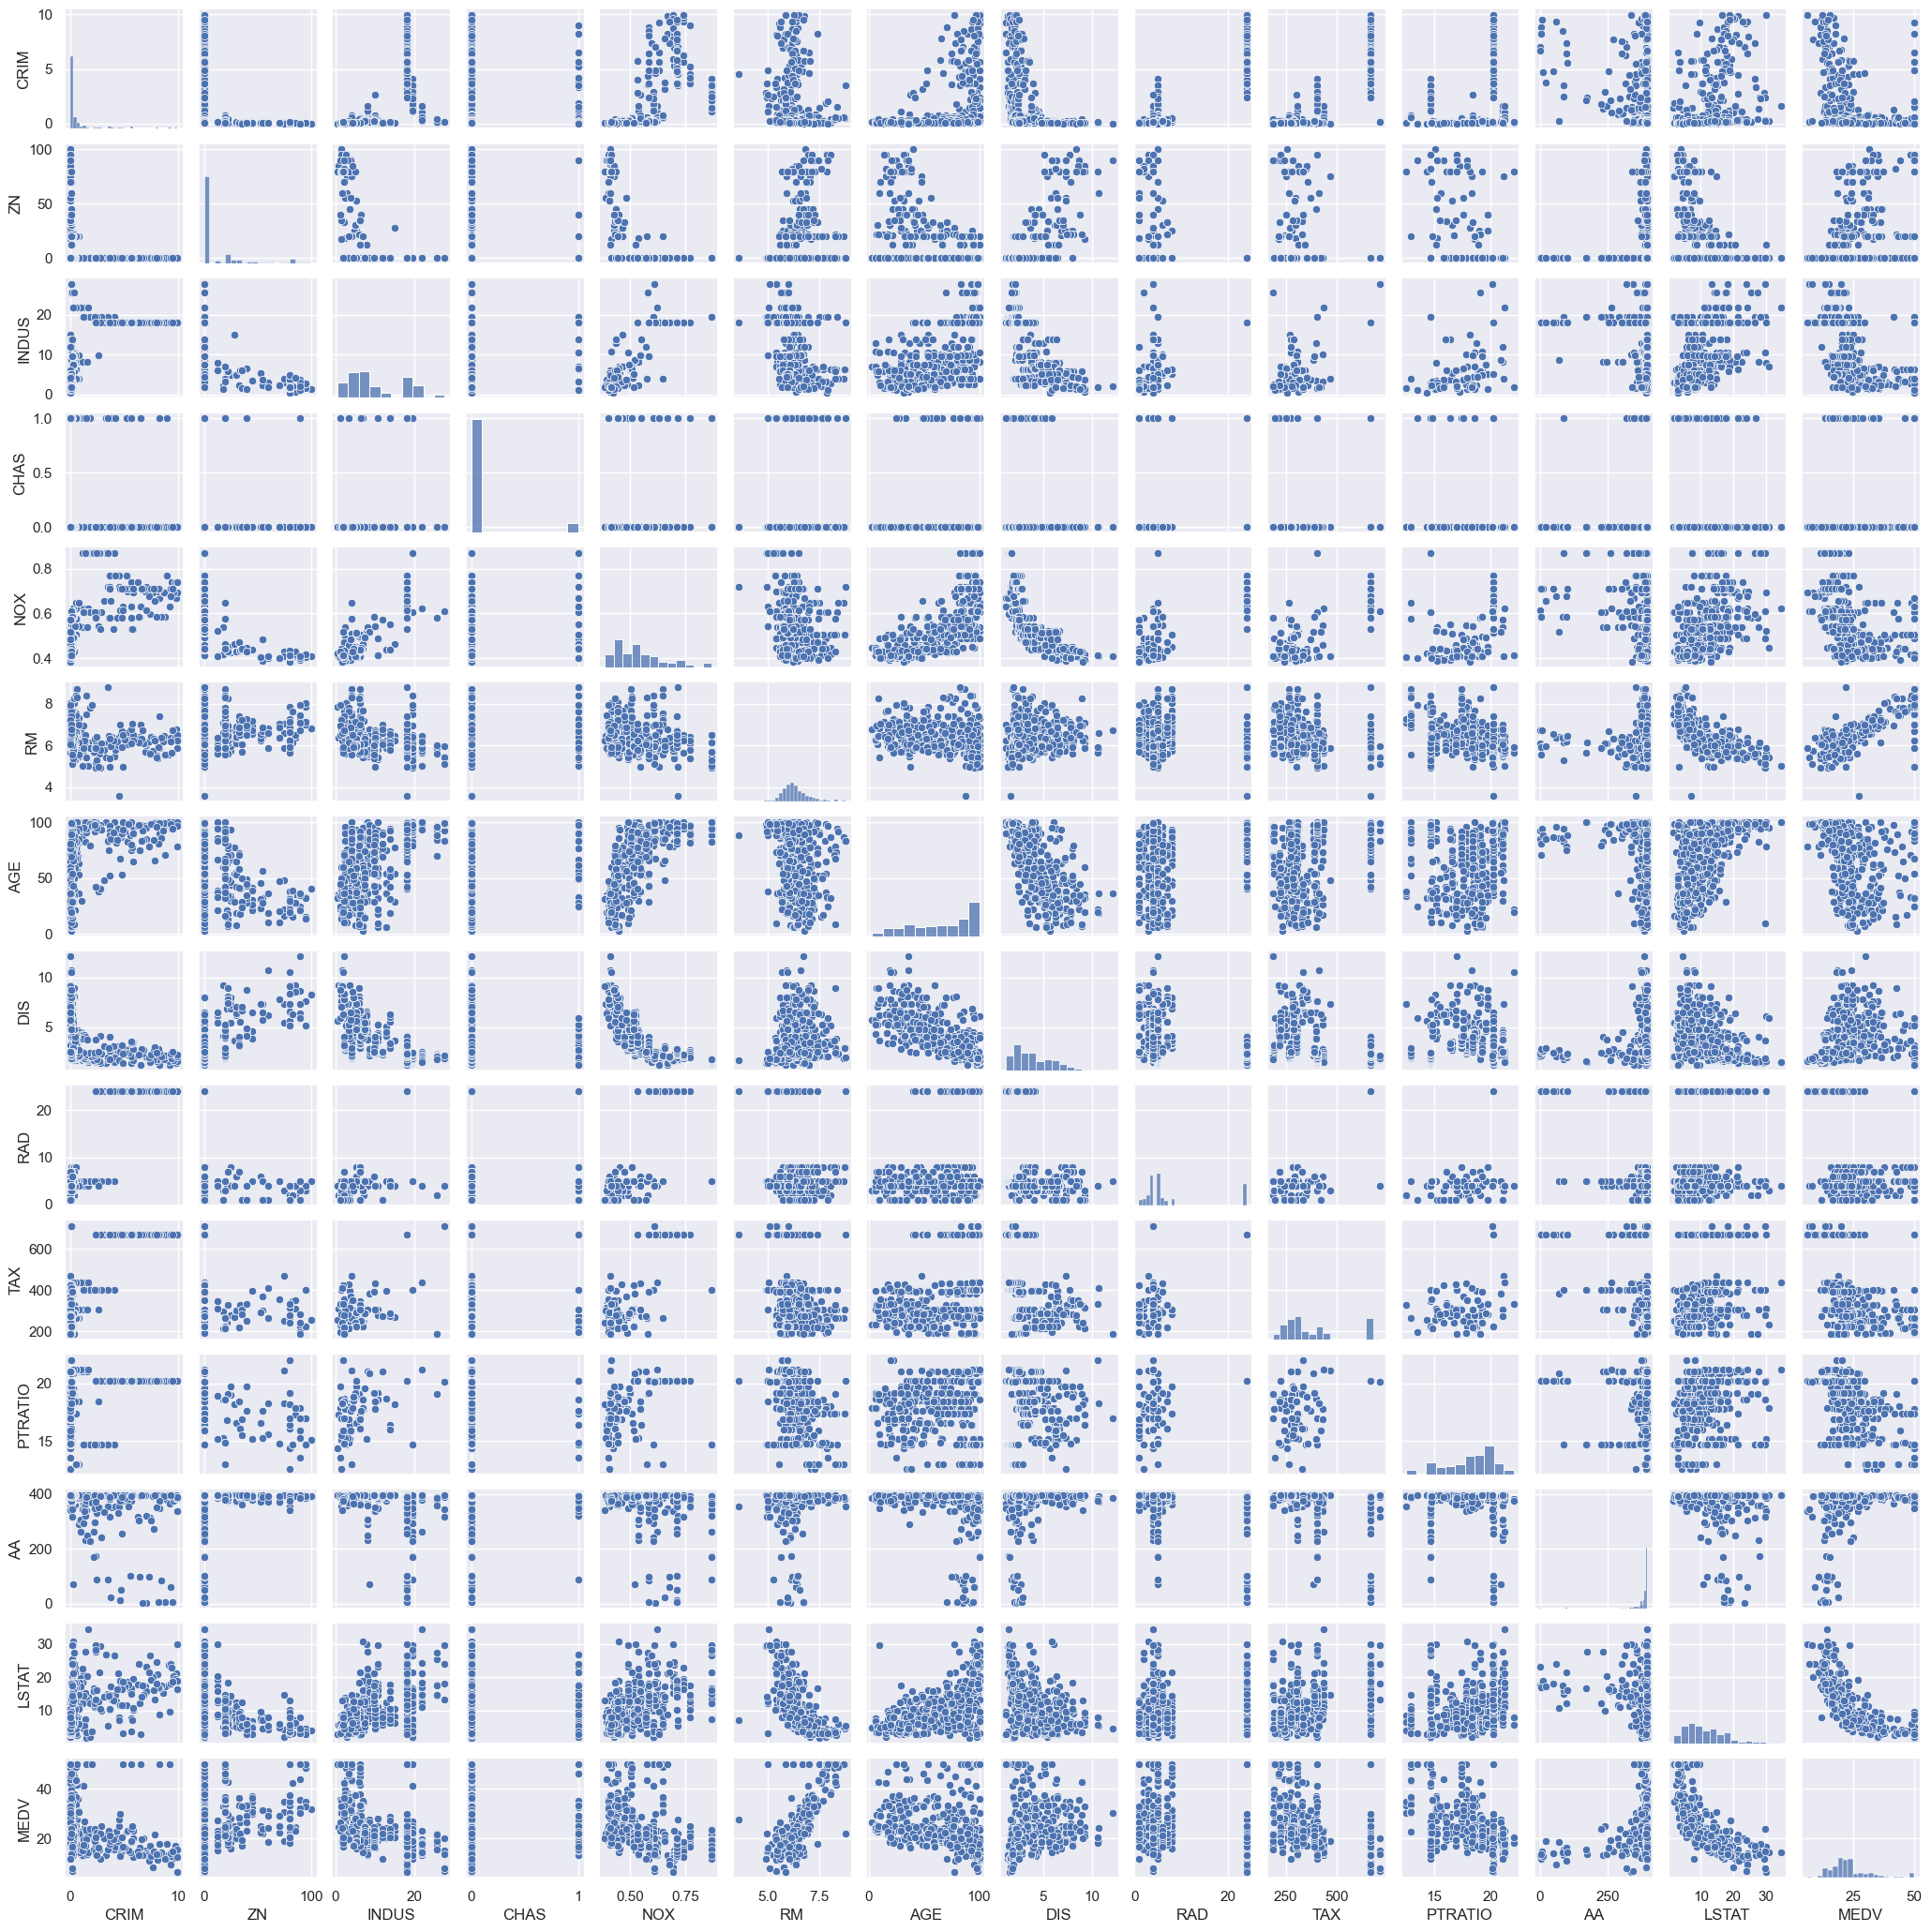

In [15]:
#Here we are using the seaborn to use the pairplot for the dataframe

sns.pairplot(df, height=1.5);
plt.show()

## Correlations

In [16]:
# To format the data in the dataframe to round the float upto 3 decimals

pd.options.display.float_format = '{:,.3f}'.format

In [17]:
# Here we will get the correlations, with only 3 decimals.

df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,AA,LSTAT,MEDV
CRIM,1.000,-0.281,0.574,0.050,0.637,-0.142,0.448,-0.462,0.898,0.826,0.319,-0.413,0.425,-0.286
ZN,-0.281,1.000,-0.514,-0.060,-0.501,0.307,-0.556,0.656,-0.267,-0.269,-0.364,0.150,-0.411,0.332
INDUS,0.574,-0.514,1.000,0.103,0.739,-0.365,0.606,-0.669,0.513,0.673,0.317,-0.317,0.565,-0.412
CHAS,0.050,-0.060,0.103,1.000,0.134,0.077,0.123,-0.141,0.057,0.017,-0.100,0.013,-0.009,0.154
NOX,0.637,-0.501,0.739,0.134,1.000,-0.265,0.707,-0.746,0.542,0.615,0.103,-0.358,0.537,-0.333
RM,-0.142,0.307,-0.365,0.077,-0.265,1.000,-0.188,0.139,-0.096,-0.215,-0.334,0.108,-0.607,0.740
AGE,0.448,-0.556,0.606,0.123,0.707,-0.188,1.000,-0.720,0.359,0.427,0.193,-0.224,0.573,-0.300
DIS,-0.462,0.656,-0.669,-0.141,-0.746,0.139,-0.720,1.000,-0.388,-0.444,-0.152,0.234,-0.424,0.139
RAD,0.898,-0.267,0.513,0.057,0.542,-0.096,0.359,-0.388,1.000,0.873,0.387,-0.353,0.310,-0.218
TAX,0.826,-0.269,0.673,0.017,0.615,-0.215,0.427,-0.444,0.873,1.000,0.385,-0.367,0.411,-0.346


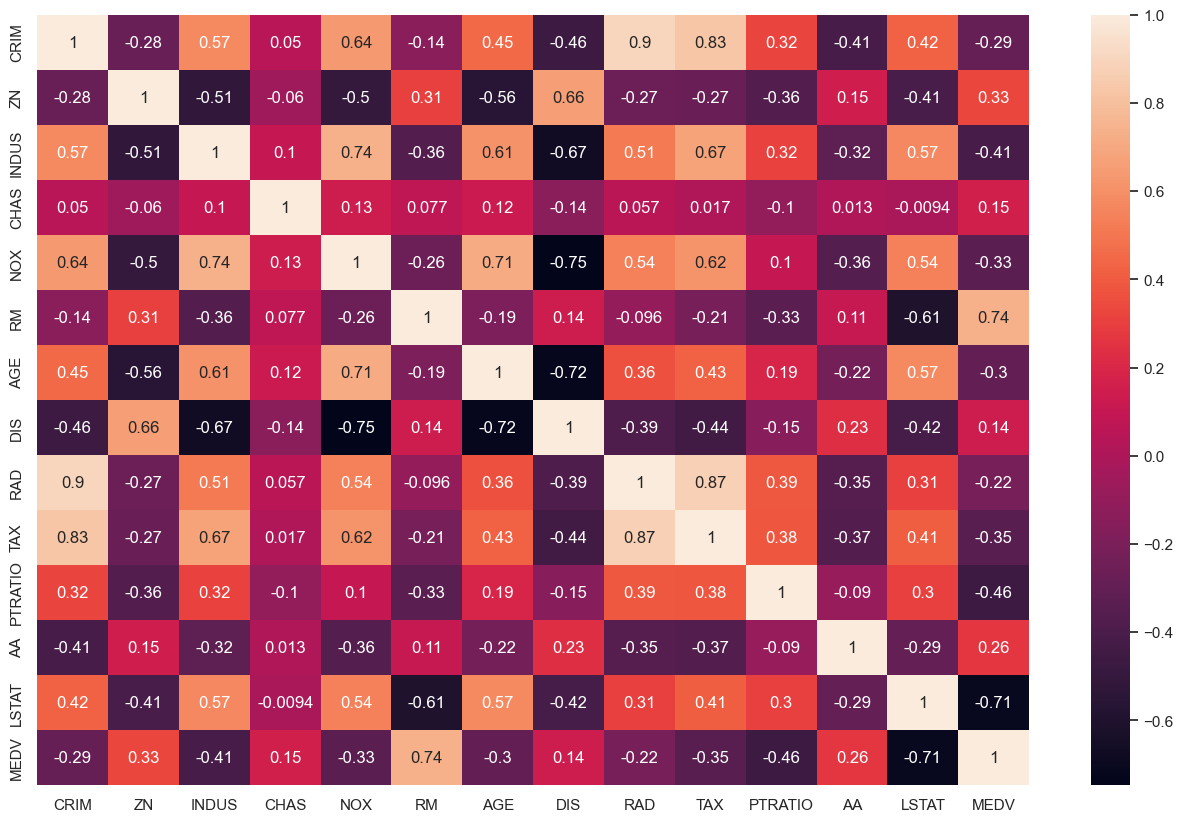

In [18]:
# We could simply look at the correlations but a heatmap is a great way to present to the general audience.

plt.figure(figsize =(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [19]:
# Now let's say we want to decrease the amount of variables in our heatmap.  We would use the following code.  This will be on the final!
#  Remember how to make a subset.  Try using different variables.

df2= df[['CRIM','INDUS', 'TAX','MEDV']]

In [20]:
# Here we will look at the correlations for only the variables in df2.

df2.corr()

,CRIM,INDUS,TAX,MEDV
CRIM,1.000,0.574,0.826,-0.286
INDUS,0.574,1.000,0.673,-0.412
TAX,0.826,0.673,1.000,-0.346
MEDV,-0.286,-0.412,-0.346,1.000


## Creating a Pair Plot

## Creating a Heat Map

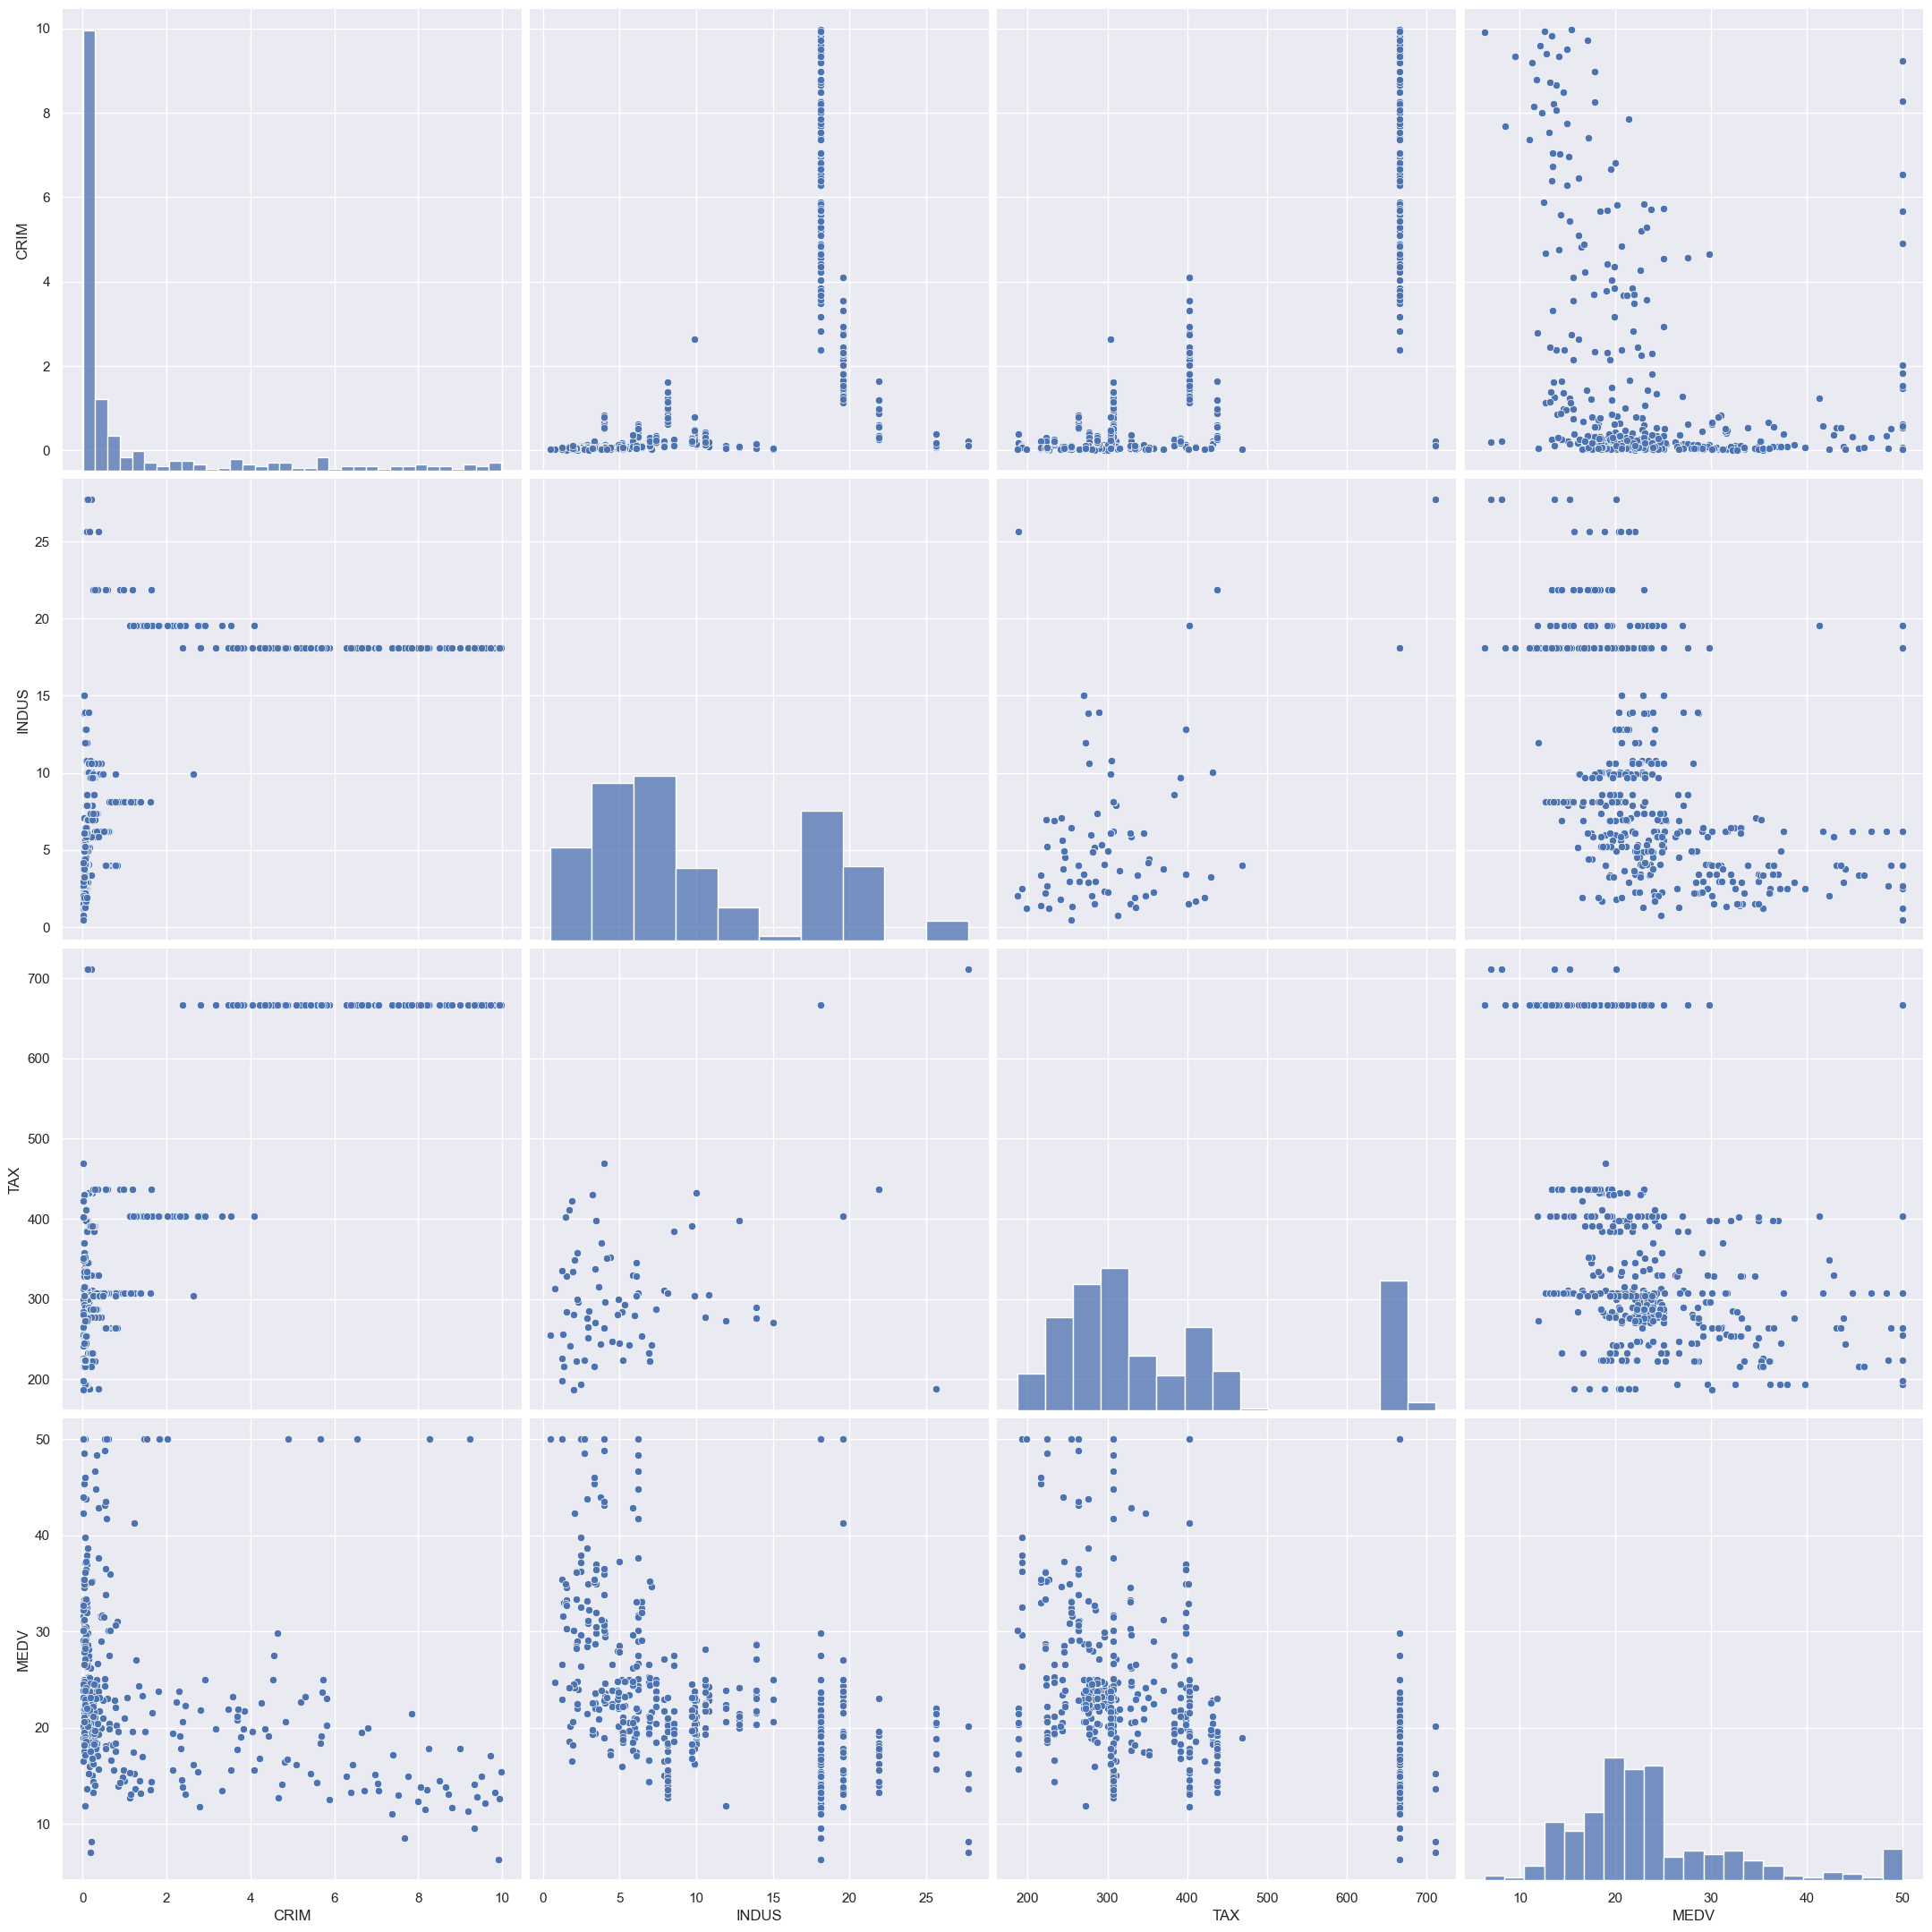

In [21]:
# Let's try the pairplot with only the variables in df2

sns.pairplot(df2, height=5.5);
plt.show()

<Figure size 2000x1200 with 0 Axes>

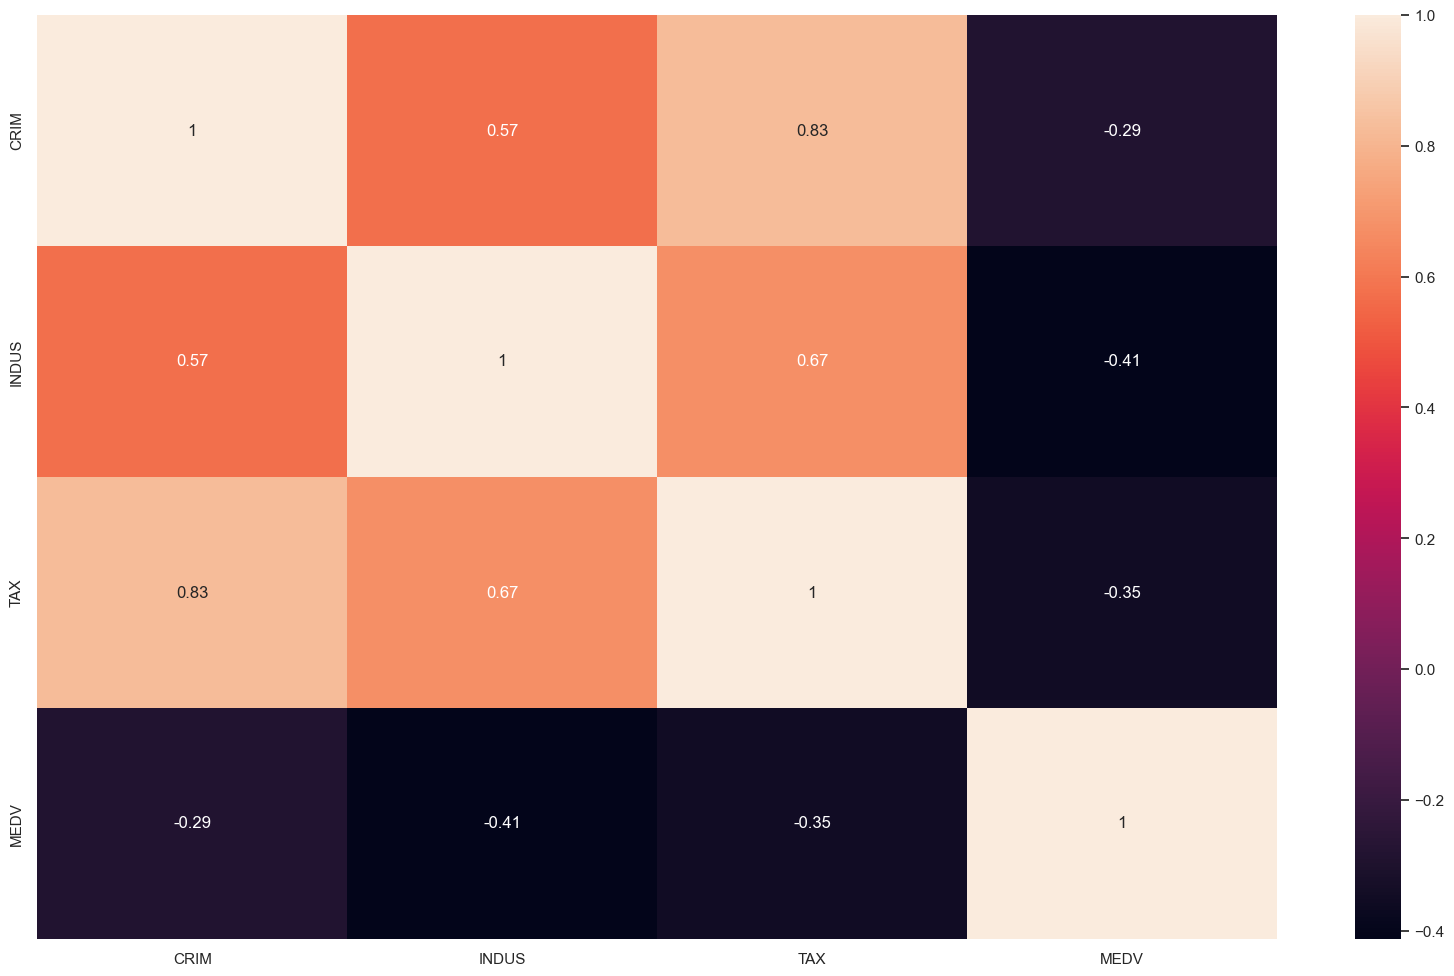

In [22]:
# Now we will make a heatmap with only the variables in df2 subset.  Again, it is very important to understand this for the final.

plt.figure(figsize =(20,12))
plt.figure(figsize = (20,12))
sns.heatmap(df2.corr(), annot=True)
plt.show()

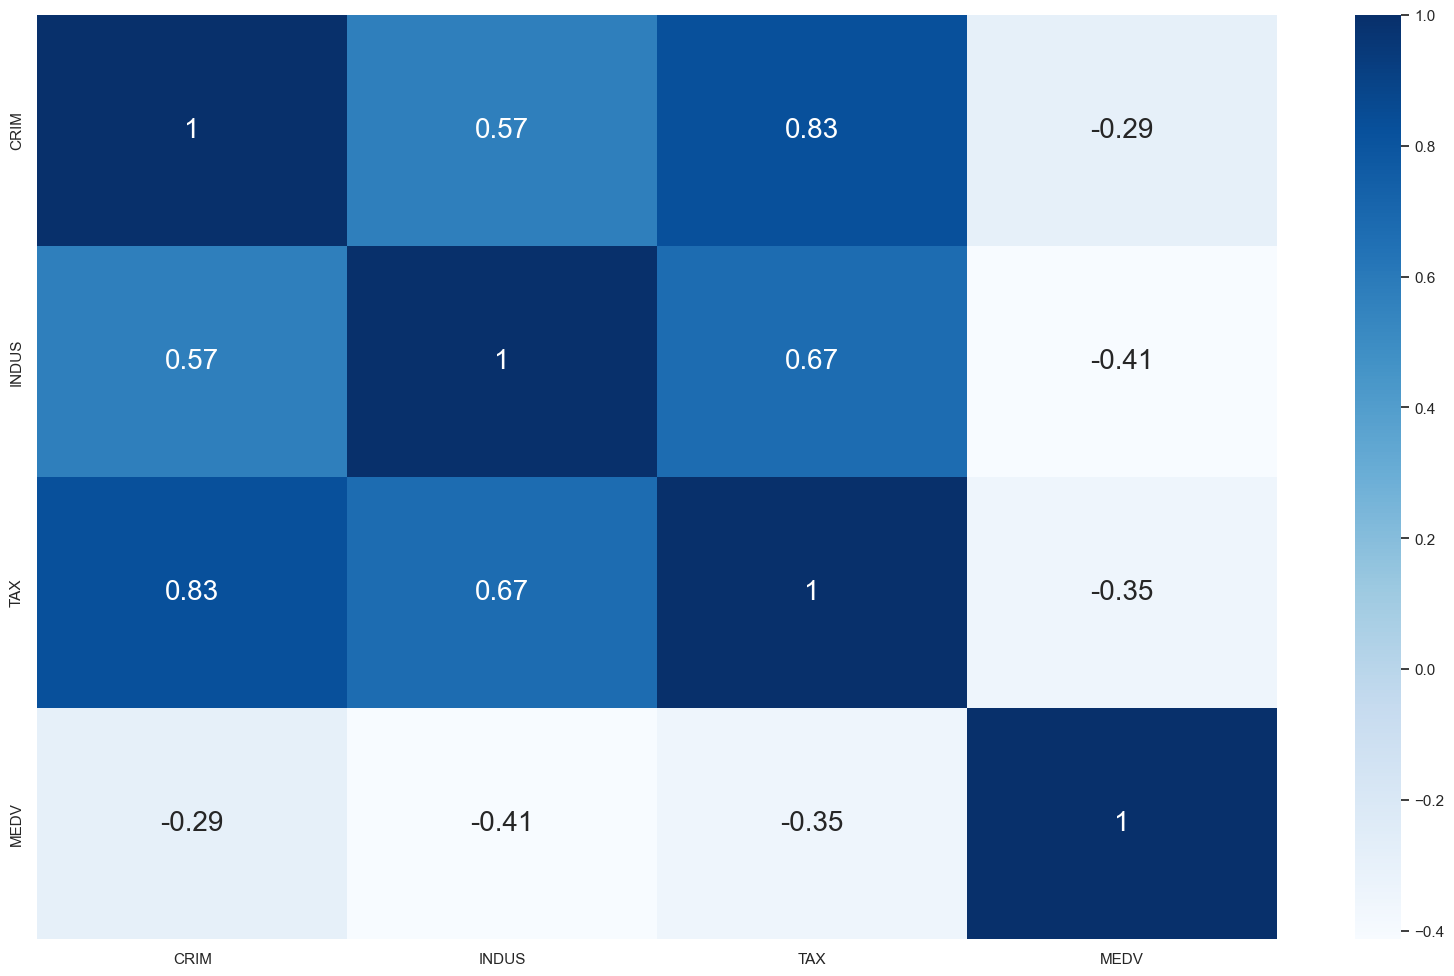

In [23]:
#If you want to change the color and font, to make the labels easier to read, use this code.

plt.figure(figsize =(20,12))
sns.heatmap(df2.corr(), cmap="Blues", annot=True, annot_kws={"fontsize":20})
plt.show()

## Separate the Dataset into Input & Output NumPy Arrays


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Store the dataframe values into a numPy array

array= df2.values

# Separate the array into input and output components by slicing (you used this in your homework)
# For X (input) [:,3] --> All the rows and columns from 0 up to 3

X = array [:, 0:3]

# For Y (output) [:3] --> All the rows in the last column (MEDV)

Y = array [:,3]

## Spilt into Input/Output Array into Training/Testing Datasets

In [26]:
# Split the dataset --> training sub-dataset:  67%, and test sub-dataset:  33%

test_size = 0.33

# Selection of records to include in which sub-dataset must be done randomly - use the for seed radomization

seed = 7

# Split the dataset (both input & output) into training/testing datasets
# if random_state = None : Calling the function multiple times will produce different results.
# if random_state = Integer : Will produce the same results across different calls

X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=seed)

## Build and Train the Model

In [27]:
# Build the model

model=LinearRegression()

# Train the model using the training sub-dataset

model.fit(X_train, Y_train)

#Print out the coefficients and the intercept
# Print intercept and coefficients
# are the variables statistically significant
# interdept = mean (average) value of Y
# if the value is less than 0.05: there is a strong relationship between the variable and the target  

print ("Intercept:", model.intercept_)
print ("Coefficients:", model.coef_)

Intercept: 31.393427670412905
Coefficients: [ 0.09859287 -0.42388844 -0.00931847]


In [28]:
# If we want to print out the list of the coefficients with their correspondent variable name
# Pair the feature names with the coefficients

names_2 = ["CRIM", "INDUS", "TAX"]

coeffs_zip = zip(names_2, model.coef_)

# Convert iterator into set

coeffs = set(coeffs_zip)

# Print (coeffs)

for coef in coeffs:
    print (coef, "\n")

('INDUS', -0.4238884417716135) 

('CRIM', 0.09859287239143877) 

('TAX', -0.009318474474503347) 



In [32]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1 )

LinearRegression(n_jobs=1)

## Calculate R-Squared

In [33]:
R_squared = model.score(X_test, Y_test)
print("R-squared: ", R_squared)

R-squared:  0.15473313373590392


### Notes: The higher the R-squared, the better (0 – 100%). Depending on the model, the best models score above 83%. The R-squared value tells us how well the independent variables predict the dependent variable. This is very low. Think about how you could increase the R-squared. What variables would you use? This will be important for the final.
## Prediction

In [34]:
model.predict([[12,10,450]])

array([24.14434421])

## We have now trained the model. Let’s use the trained model to predict the “Median value of owner-occupied homes in 1000 dollars” (MEDV).
## We are using the following predictors:
### CRIM: per capita crime rate by town: 12
### INDUS: proportion of non-retail business acres per town: 10
### TAX: full-value property-tax rate per  USD 10,000: 450
## Notes: So, the model predicts that the median value of owner-occupied homes in 1000 dollars in the above suburb should be around $24,144.
## Evaluate/Validate Algorithm/Model, Using K-Fold Cross-Validation

In [36]:
# We are evaluating the algorithm
# we need to provide the K-size

num_folds = 10

# Fix the random seed
# must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated

seed = 7

# Split the whole data set into folds

kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# For Linear regression, we can use MSE (mean squared error) value
# to evaluate the model/algorithm

scoring = 'neg_mean_squared_error'

# Train the model and run K-foLd cross-validation to validate/evaluate the model

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

# Print out the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation

print("Average of all results from the K-fold Cross Validation, using negative mean squared error:",results.mean())

Average of all results from the K-fold Cross Validation, using negative mean squared error: -64.35862748210982


### Notes: After we train, we evaluate. We are using K-fold to determine if the model is acceptable. We pass the whole set since the system will divide it for us. We see there is a -64 avg of all errors (mean of square errors). This value would traditionally be a positive value but scikit reports this value as a negative value. If the square root would have been evaluated, the value would have been around 8.
 

### Let's use a different scoring parameter. Here we use the Explained Variance. The best possible score is 1.0, lower values are worse.

In [38]:
# We are evaluating the algorithm
# we need to provide the K-size

num_folds = 10

# Now, we are fixing the random seed must use the same seed value so that the same subsets can be obtained
# for each time the process is repeated

seed = 7

# Splitting the whole data set into folds

kfold= KFold(n_splits=num_folds, random_state=seed, shuffle=True)

# For Linear regression, we can use explained variance value to evaluate the model/algorithm

scoring = 'explained_variance'

# Train the model and run K-foLd cross-validation to validate/evaluate the model

results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)

# Printing the evaluation results
# Result: the average of all the results obtained from the k-fold cross validation

print("Average of all results from the K-fold Cross Validation, using exlpained variance:",results.mean())

Average of all results from the K-fold Cross Validation, using exlpained variance: 0.19023822025958675
